## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.utils import load_img
import os
import time
import random

## Import data and data augmentation

In [2]:
train_data_gen = ImageDataGenerator(
    rescale = 1/255.,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip = True,
    shear_range = 0.3,
    rotation_range = 0.2,
    fill_mode = 'nearest',
    zoom_range = 0.2, 
)

In [3]:
test_data_gen = ImageDataGenerator(
    rescale = 1./255
)

In [3]:
train_set = train_data_gen.flow_from_directory(
    directory = '../../../Datasets/Image classification datasets/pests images/pest/train',
    batch_size = 32,
    shuffle = True,
    target_size = (224, 224),
    class_mode = 'categorical'
)

Found 2700 images belonging to 9 classes.


In [6]:
test_set = test_data_gen.flow_from_directory(
    directory = '../../../Datasets/pests images/pest/test',
    batch_size = 32,
    target_size = (224, 224),
    shuffle = True,
    class_mode = 'categorical'
)

Found 450 images belonging to 9 classes.


In [7]:
class_names = train_set.class_indices
class_names

{'aphids': 0,
 'armyworm': 1,
 'beetle': 2,
 'bollworm': 3,
 'grasshopper': 4,
 'mites': 5,
 'mosquito': 6,
 'sawfly': 7,
 'stem_borer': 8}

In [8]:
len(train_set)  # 2700/32  ~ 85

85

### Observing a batch

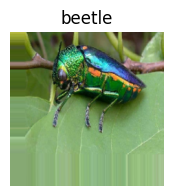

In [22]:
imgs, labels = train_set.next()    # Next method is used to fetch a batch of random images from the directory
plt.figure(figsize = (2, 2))
plt.imshow(imgs[0])
plt.title(list(class_names)[np.argmax(labels[0])])
plt.axis(False);

### A function to observe random images

In [31]:
def view_rand_img(class_names = class_names):
    '''
    View random image from your training set images

    args
    ----
    class_names : class names of the images

    Return --> None
    '''

    PATH = '../../../Datasets/pests images/pest/train'   # Training dir path
    classes = list(class_names)    # Making sure it is a list
    pest = random.choice(classes)  # Selecting a random image class
    DIR_PATH = os.path.join(PATH, pest)    # Attaching it to the Training dir path
    imgs = os.listdir(DIR_PATH)   # Get all image names as a list
    rand_img = random.choice(imgs)   # Randomly choosing an image from the list
    IMG_PATH = os.path.join(DIR_PATH, rand_img)    # Getting the random image path
    pest_img = load_img(IMG_PATH, target_size = (256, 256, 3))   # Loading the random image
    plt.figure(figsize = (3, 3))   
    plt.imshow(img_to_array(pest_img)/255.)  # Making it as an array and plotting it
    plt.title(pest)
    plt.axis(False)

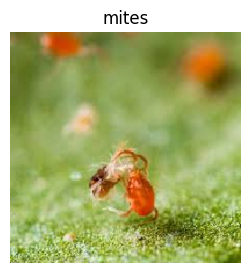

In [32]:
view_rand_img()

## CNN Model 

In [33]:
# model = Sequential()
# model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), input_shape = (128, 128, 3), activation = 'relu'))
# model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same' ))
# model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))

# model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu'))
# model.add(Conv2D(filters = 10, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same' ))
# model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))

# model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same' ))
# model.add(MaxPool2D(pool_size = (2, 2), padding = 'valid'))

# model.add(Flatten())

# model.add(Dense(units = len(class_names), activation = 'softmax'))

In [34]:
# model.compile(loss = CategoricalCrossentropy(),
#               optimizer = Adam(),
#               metrics = ['accuracy'])

In [35]:
# model.fit(train_set, validation_data = test_set, epochs = 20)

In [36]:
# model.evaluate(test_set)

In [37]:
# model.save(f"model_at_{time.time()}.keras")

## Using Transfer Learning

In [38]:
!pip install --upgrade tensorflow_hub

In [27]:
import tensorflow_hub as hub

In [28]:
mobile_net_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/5"

In [29]:
def create_model(model_url, num_classes):
    if(num_classes == 2):
        activation_func = 'sigmoid'
    else:
        activation_func = 'softmax'

    model = Sequential()
    model.add(hub.KerasLayer(
        handle = model_url,
        trainable = False,    # Freeze the params of the pre-trained model
        input_shape = (224, 224, 3)
    ))
    model.add(Dense(units = num_classes, activation = activation_func))

    return model

In [30]:
model = create_model(model_url = mobile_net_url, num_classes = len(class_names))

### Compile the model

In [31]:
model.compile(loss = CategoricalCrossentropy(),
              optimizer = Adam(),
              metrics = ['accuracy'])

In [32]:
history = model.fit(train_set, validation_data = test_set, epochs = 5)

Epoch 1/5
85/85 [==============================] - 51s 562ms/step - loss: 1.1899 - accuracy: 0.6119 - val_loss: 0.6832 - val_accuracy: 0.7978
Epoch 2/5
85/85 [==============================] - 47s 553ms/step - loss: 0.5507 - accuracy: 0.8433 - val_loss: 0.4466 - val_accuracy: 0.8622
Epoch 3/5
85/85 [==============================] - 40s 471ms/step - loss: 0.3939 - accuracy: 0.8907 - val_loss: 0.3496 - val_accuracy: 0.9089
Epoch 4/5
85/85 [==============================] - 40s 473ms/step - loss: 0.2822 - accuracy: 0.9319 - val_loss: 0.2939 - val_accuracy: 0.9311
Epoch 5/5
85/85 [==============================] - 42s 488ms/step - loss: 0.2229 - accuracy: 0.9530 - val_loss: 0.2417 - val_accuracy: 0.9467


## Plot model performance

In [33]:
plt.style.use("fivethirtyeight")

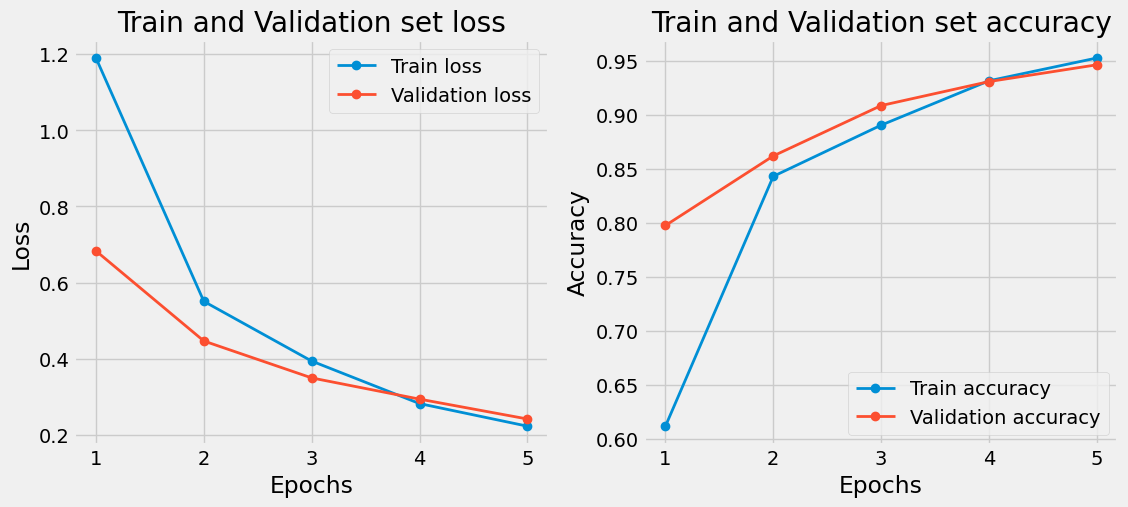

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.plot(np.arange(0, 5), history.history['loss'], label = "Train loss", linewidth = 2, marker = 'o')
ax1.plot(np.arange(0, 5), history.history['val_loss'], label = "Validation loss", linewidth = 2, marker = 'o')
ax1.set_xticks((0, 1, 2, 3, 4), (1, 2, 3, 4, 5))
ax1.set_title("Train and Validation set loss")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(np.arange(0, 5), history.history['accuracy'], label = "Train accuracy", linewidth = 2, marker = 'o')
ax2.plot(np.arange(0, 5), history.history['val_accuracy'], label = "Validation accuracy", linewidth = 2, marker = 'o')
ax2.set_xticks((0, 1, 2, 3, 4), (1, 2, 3, 4, 5))
ax2.set_title("Train and Validation set accuracy")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend();



In [36]:
model.evaluate(test_set)

15/15 [==============================] - 5s 297ms/step - loss: 0.2417 - accuracy: 0.9467


[0.2417348027229309, 0.9466666579246521]

In [37]:
model.save('mobilenetv2.keras')

## Function to predict random images

In [69]:
def predict_rand_img(model, classes):
    PATH = '../../../Datasets/pests images/pest/train'   # Training dir path
    classes = list(class_names)    # Making sure it is a list
    pest = random.choice(classes)  # Selecting a random image class
    DIR_PATH = os.path.join(PATH, pest)    # Attaching it to the Training dir path
    imgs = os.listdir(DIR_PATH)   # Get all image names as a list
    rand_img = random.choice(imgs)   # Randomly choosing an image from the list
    IMG_PATH = os.path.join(DIR_PATH, rand_img)    # Getting the random image path
    pest_img = load_img(IMG_PATH, target_size = (224, 224, 3))   # Loading the random image
    img = img_to_array(pest_img)/255.  # Making it as an array and plotting it
    plt.figure(figsize = (3, 3))   
    plt.imshow(img)
    img = np.expand_dims(img, axis = 0)
    pred_ind = model.predict(img).argmax(axis = 1)
    pred_class = classes[int(pred_ind)]
    if(pred_class == pest):
        plt.title(f"{pred_class} (Actual : {pest})", color = 'g', fontsize = 10)
    else:
        plt.title(f"{pred_class} (Actual : {pest})", color = 'r', fontsize = 10)
    
    plt.axis(False)

1/1 [==============================] - 0s 27ms/step


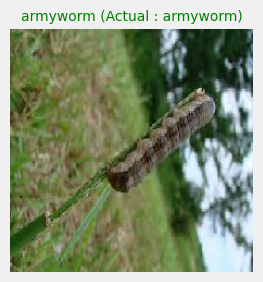

In [79]:
predict_rand_img(model, class_names)